# Calculating Weighting Functions with HR

In this example we calculate weighting functions for ozone in a one-dimensional atmosphere using the HR model.  

In [1]:
%matplotlib inline

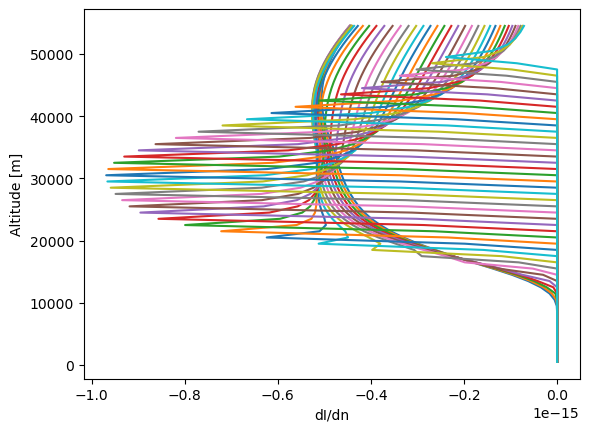

In [2]:
import sasktran as sk
import matplotlib.pyplot as plt
import numpy as np
from sasktran.geometry import VerticalImage

tanalts_km = np.arange(10, 50, 1)

# First recreate our geometry and atmosphere classes
geometry = VerticalImage()
geometry.from_sza_saa(sza=60, saa=60, lat=0, lon=0, tanalts_km=tanalts_km, mjd=54372, locallook=0,
                      satalt_km=600, refalt_km=20)

atmosphere = sk.Atmosphere()

atmosphere['ozone'] = sk.Species(sk.O3OSIRISRes(), sk.Labow())
atmosphere['air'] = sk.Species(sk.Rayleigh(), sk.MSIS90())

# Set the species to calculate the weighting function for
atmosphere.wf_species = 'ozone'

# And now make the engine
engine = sk.EngineHR(geometry=geometry, atmosphere=atmosphere)

# Choose some wavelengths to do the calculation at
engine.wavelengths = [330]

# Set up where we want to calculate the WF
# Here we do 1000 m shells centered at 500m, 1500m, 2500m, ...
wf_alts_m = np.arange(500, 55000, 1000)
engine.options['wfheights'] = wf_alts_m
engine.options['wfwidths'] = np.ones_like(wf_alts_m) * 1000

# And do the calculation
radiance, wf = engine.calculate_radiance()

# wf is shape [wavelength, lines of sight, perturbation]
plt.plot(wf[0, :, :].T, wf_alts_m)
plt.xlabel('dI/dn')
plt.ylabel('Altitude [m]')

plt.show()